# 🟦 **K-Nearest Neighbors (KNN)**

*KNN is a simple and powerful machine learning algorithm used mainly for classification.*

---

## 🔍 **What is KNN?**

**KNN (K-Nearest Neighbors)** ek **supervised learning algorithm** hai jo prediction banata hai **nearest (closest) points** ko dekh kar.

Jab hum aik new data point dete hain, KNN:

1. Uske **k nearest neighbors** dhoondta hai
2. Un ke labels dekhta hai
3. **Majority vote** ke basis par output decide karta hai

---

## 🧠 **How KNN Works (Step-by-Step)**

### **1️⃣ Choose K**

* K = number of neighbors
* Example: K = 3 → 3 nearest points dekhega

### **2️⃣ Calculate Distance**

KNN nearest points dhoondta hai using:

* **Euclidean Distance** (most common)
* Manhattan Distance
* Minkowski Distance

### **3️⃣ Pick Top K Neighbors**

Nearest points ko ascending order me select karta hai.

### **4️⃣ Majority Voting (Classification)**

Jis class ka count zyada ho → final prediction.

### **5️⃣ Averaging (Regression)**

Regression me nearest values ka **average** leta hai.

---

## 🎯 **Simple Example**

Assume K = 3
Nearby labels:
🐱 Cat
🐱 Cat
🐶 Dog

**Predicted Class → Cat** (majority = Cat)

---

## 🧩 **Important Concepts**

### **📌 1. Choosing K**

* **Small K** → noisy, unstable
* **Large K** → smooth but slow
* Best K usually odd number (3, 5, 7)

### **📌 2. Distance Matters**

Points ka distance jitna kam → similarity zyada.

### **📌 3. Feature Scaling**

Important!
KNN distance-based hai, isliye data ko scale karna zaroori hota hai:

* **StandardScaler**
* **MinMaxScaler**

---

## 👍 **Advantages**

✔ Very simple
✔ Easy to understand
✔ No training phase required
✔ Performs well with small datasets

---

## 👎 **Disadvantages**

❌ Slow for large datasets
❌ Sensitive to noisy/outlier data
❌ Must do scaling
❌ High memory use

---

## 🧪 **KNN in Python (Simple Example)**

```python
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Scale data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Score
print("Accuracy:", knn.score(X_test, y_test))
```

---

## 🏁 **Summary**

| Topic              | Explanation              |
| ------------------ | ------------------------ |
| **Algorithm Type** | Supervised               |
| **Main Use**       | Classification           |
| **Key Idea**       | Nearest neighbors decide |
| **Important Step** | Distance calculation     |
| **Needs Scaling**  | Yes                      |


# **`Classification using KNN`**

In [92]:
# Example of KNN classifier on IRIS data uing Seaborn

# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [93]:
# load the dataset
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [95]:
# Split the data into X and y 
X = df.drop('species', axis=1)
y = df[['species']]

In [96]:
# load and fit the KNN  classifier on the data
from sklearn.neighbors import KNeighborsClassifier


In [97]:
# train test split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, 
random_state=42)



In [98]:
model = KNeighborsClassifier(n_neighbors=5)
# fit the model on the training data
model.fit(X_train, y_train)

/opt/miniconda3/envs/python_ml/lib/python3.14/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [99]:
# predict the model 
y_pred = model.predict(X_test)

In [100]:
# evaluate the model 
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Text(50.722222222222214, 0.5, 'Orignal')

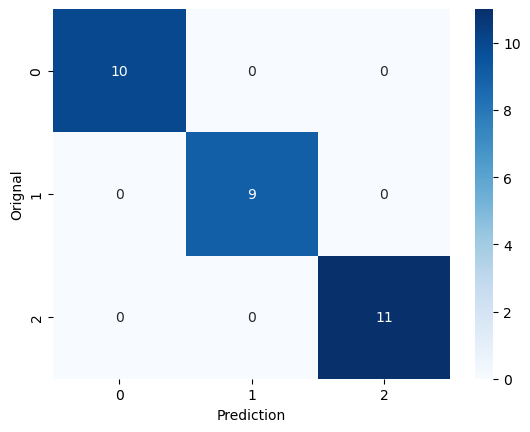

In [101]:
# plot the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
plt.xlabel('Prediction')
plt.ylabel('Orignal')


# **`Regression using KNN`**

In [102]:
# Regression problem on tips dataset

# load tips dataset
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [103]:
# Split the data into X and y
X = df.drop('tip', axis=1)
y = df['tip']

In [104]:
 # encode the categorical  columns
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
        X[col] = le.fit_transform(X[col])
    


In [105]:
# train test split the model
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor


X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, 
random_state=42)

# call the model 
model = KNeighborsRegressor(n_neighbors=5, metric='minkowski', p=2)

# fit the model on the training data
model.fit(X_train, y_train)

# predict the spcies for the test data
y_pred = model.predict(X_test)



In [ ]:
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    mean_absolute_percentage_error,
    r2_score
)
import numpy as np

# R2 Score
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

# MAE
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

# MSE
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

# RMSE
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)
print("MAPE:", mape)

# Adjusted R2
n = X_test.shape[0]     # samples
k = X_test.shape[1]     # features
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - k - 1))
print("Adjusted R²:", adjusted_r2)


R² Score: 0.3294034029001649
MAE: 0.7262448979591837
MSE: 0.8382265306122448
RMSE: 0.9155471209130881
MAPE: 0.3197071562791562


In [114]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [115]:
# predict a specific value
model.predict([[19.97, 1, 0, 1, 1, 2 ]])

/opt/miniconda3/envs/python_ml/lib/python3.14/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([2.884])